In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous_absolute
%store -r Y_relative_footsteps_continuous_absolute
print(X_relative_footsteps_continuous_absolute.shape)
print(Y_relative_footsteps_continuous_absolute.shape)

(10027, 32)
(10027, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FR is swinging
idxs = np.where(X_relative_footsteps_continuous_absolute[:, 22] == 1)[0]
X_relative_footsteps_continuous_absolute_FR_swinging = X_relative_footsteps_continuous_absolute[idxs]
Y_relative_footsteps_continuous_absolute_FR_swinging = Y_relative_footsteps_continuous_absolute[idxs]

## Predict FR foot -> x

In [8]:
X_relative_footsteps_continuous_absolute_FR_swinging[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.06422444,  0.12709958,
        0.02129842,  0.03284169,  0.00745874, -0.01805852,  0.235     ,
        0.187     , -0.405     ,  0.233     , -0.203     , -0.405     ,
       -0.261     ,  0.133     , -0.4       , -0.25      , -0.152     ,
       -0.401     ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        , -5.84216108, -0.23784905,
       -5.82474492, -0.26088653])

In [9]:
Y_relative_footsteps_continuous_absolute_FR_swinging[0, :]

array([ 0.02641616, -0.00403748,  0.03441616, -0.00103748])

### Linear Regression

In [16]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_FR_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 3:9], # felt velocities
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_FR_swinging[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_x = LinearRegression()

# Fit the model
model_fr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9982246912095664
RMSE:  0.00338593104649027
The lowest error is:  8.938693382698482e-07
The highest error is:  0.02158693554926322
The avg. error is:  0.0023869909660268526


In [17]:
model_fr_relative_swinging_x.coef_

array([[ 0.32839572, -0.04714625, -0.11133982, -0.13585002,  0.02782288,
         0.026687  ,  0.01109038, -0.0081996 ,  0.12479007, -0.16405499,
         0.39720701, -0.5720436 ,  0.02019725,  0.01433763,  0.09571478,
         0.20154869,  0.04758636]])

In [18]:
model_fr_relative_swinging_x.intercept_

array([0.14757465])

Text(0, 0.5, 'Predictions')

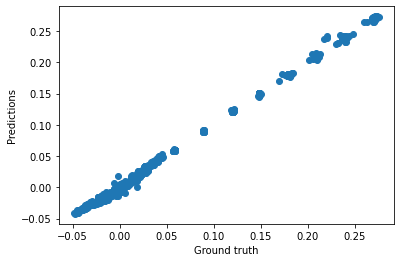

In [19]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [20]:
#%store model_fr_relative_swinging_x

In [21]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [22]:
# Save model
#joblib.dump(model_fr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_x.sav")

### Predict FR foot -> y

In [25]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_FR_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 3:9], # felt velocities
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_FR_swinging[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_y = LinearRegression()

# Fit the model
model_fr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9960845537632865
RMSE:  0.004113513914278289
The lowest error is:  2.5083606158576854e-05
The highest error is:  0.03026316884363675
The avg. error is:  0.0027757474689615504


In [26]:
model_fr_relative_swinging_y.coef_

array([[-0.02131934,  0.35384246,  0.17069471, -0.019309  , -0.15073623,
        -0.21713835,  0.00990064,  0.06069949, -0.16760545,  0.45731106,
        -0.15124097,  0.03922841, -0.45237282,  0.07406216, -0.18157712,
        -0.06872352, -0.00711227]])

In [27]:
model_fr_relative_swinging_y.intercept_

array([-0.13183908])

Text(0, 0.5, 'Predictions')

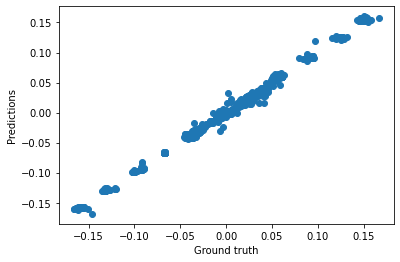

In [28]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [90]:
#%store model_fr_relative_swinging_y

In [24]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [25]:
# Save model
#joblib.dump(model_fr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_y.sav")